In [34]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

In [35]:
font = {'size'   : 20, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'

In [36]:
LCDM = Class()
LCDM.set({'h':0.5,'Omega_b':0.06,'Omega_cdm':0.94})
LCDM.compute()

In [37]:
th = LCDM.get_thermodynamics()
th.viewkeys()

dict_keys(['x_e', 'g [Mpc^-1]', 'conf. time [Mpc]', "kappa' [Mpc^-1]", 'tau_d', 'Tb [K]', 'c_b^2', 'exp(-kappa)', 'z'])

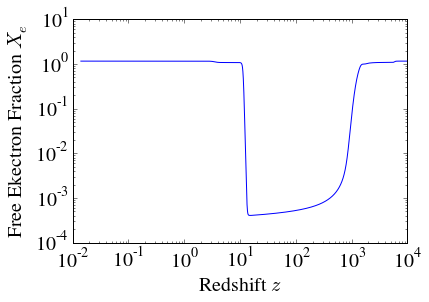

In [38]:
plt.loglog(th['z'],th['x_e'])
plt.xlabel(r"Redshift $z$")
plt.ylabel(r"Free Ekectron Fraction $X_e$")

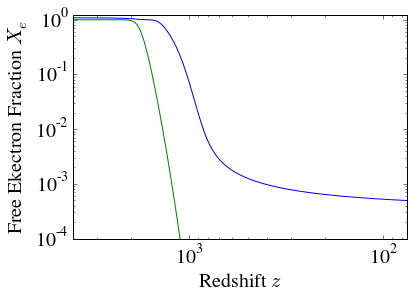

In [39]:
T_ev = LCDM.T_cmb()*(1+th['z'])*8.6173e-5
h = LCDM.h
a = 1/(1+th['z'])

rho_b_class = LCDM.Omega_b()/a**3*(LCDM.Hubble(0)*4.018054e-29)**2
rho_b_physical = rho_b_class*3/(8*np.pi)*(1.221e28)**2
n_b = rho_b_physical/938.271998e6

#LHS_Saha = 1/(1e-9*T_ev**3)*((511e3*T_ev/(2*np.pi))**(3/2)*np.exp(-13.6/T_ev))
LHS_Saha = 1/(n_b)*((511e3*T_ev/(2*np.pi))**(3/2)*np.exp(-13.6/T_ev))

Xe_Saha = 0.5*(-LHS_Saha+np.sqrt(LHS_Saha**2+4*LHS_Saha))
plt.loglog(th['z'],th['x_e'],th['z'],Xe_Saha)
plt.xlim([4000, 75])
plt.ylim([1e-4,1.2])
plt.xlabel(r"Redshift $z$")
plt.ylabel(r"Free Ekectron Fraction $X_e$")

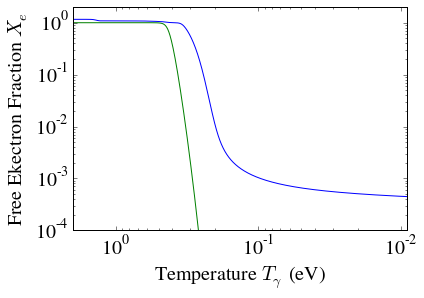

In [40]:
plt.loglog(T_ev,th['x_e'],T_ev,Xe_Saha)
plt.xlim([2,0.009])
plt.ylim([1e-4, 2])
plt.xlabel(r"Temperature $T_\gamma$ (eV)")
plt.ylabel(r"Free Ekectron Fraction $X_e$")